In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy.stats import shapiro, kstest, levene, wilcoxon
from sklearn.ensemble import GradientBoostingRegressor
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.size'] = 14  # 设置字体大小为12
plt.rcParams['axes.labelsize'] = 14  # 设置坐标轴标签字体大小
plt.rcParams['xtick.labelsize'] = 14  # 设置横轴刻度字体大小
plt.rcParams['ytick.labelsize'] = 14  # 设置纵轴刻度字体大小
plt.rcParams['figure.titlesize'] = 16  # 设置标题字体大小

data = pd.read_excel(r'D:\物联网人工智能\实验1\advertising\advertising.xlsx').iloc[:, 1:]

In [2]:
'''查看数据'''
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
'''检查数据类型以及是否有缺失值'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


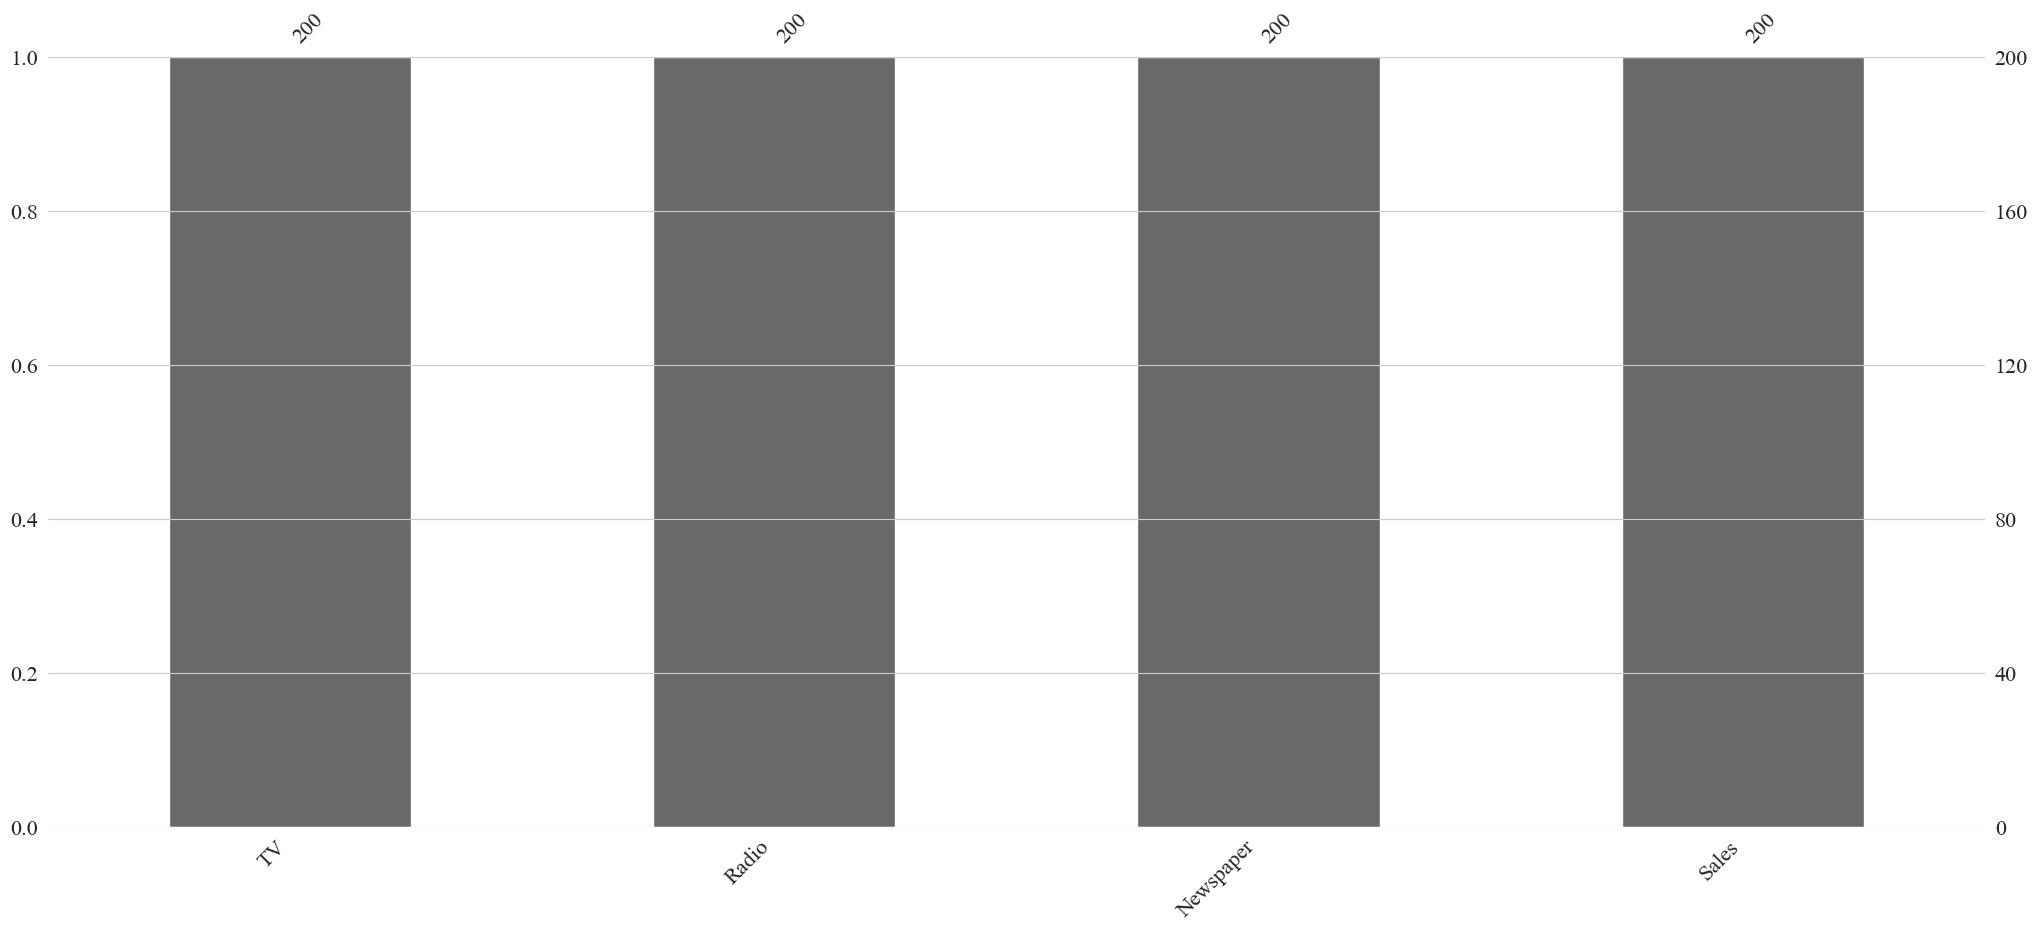

In [10]:
'''绘制缺失值可视化'''
msno.bar(data)
plt.savefig(r'D:\物联网人工智能\实验1\advertising\missing_bar_advertising.png', dpi=600)

In [8]:
'''由于都是连续性数据，绘制连续性描述性统计'''
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


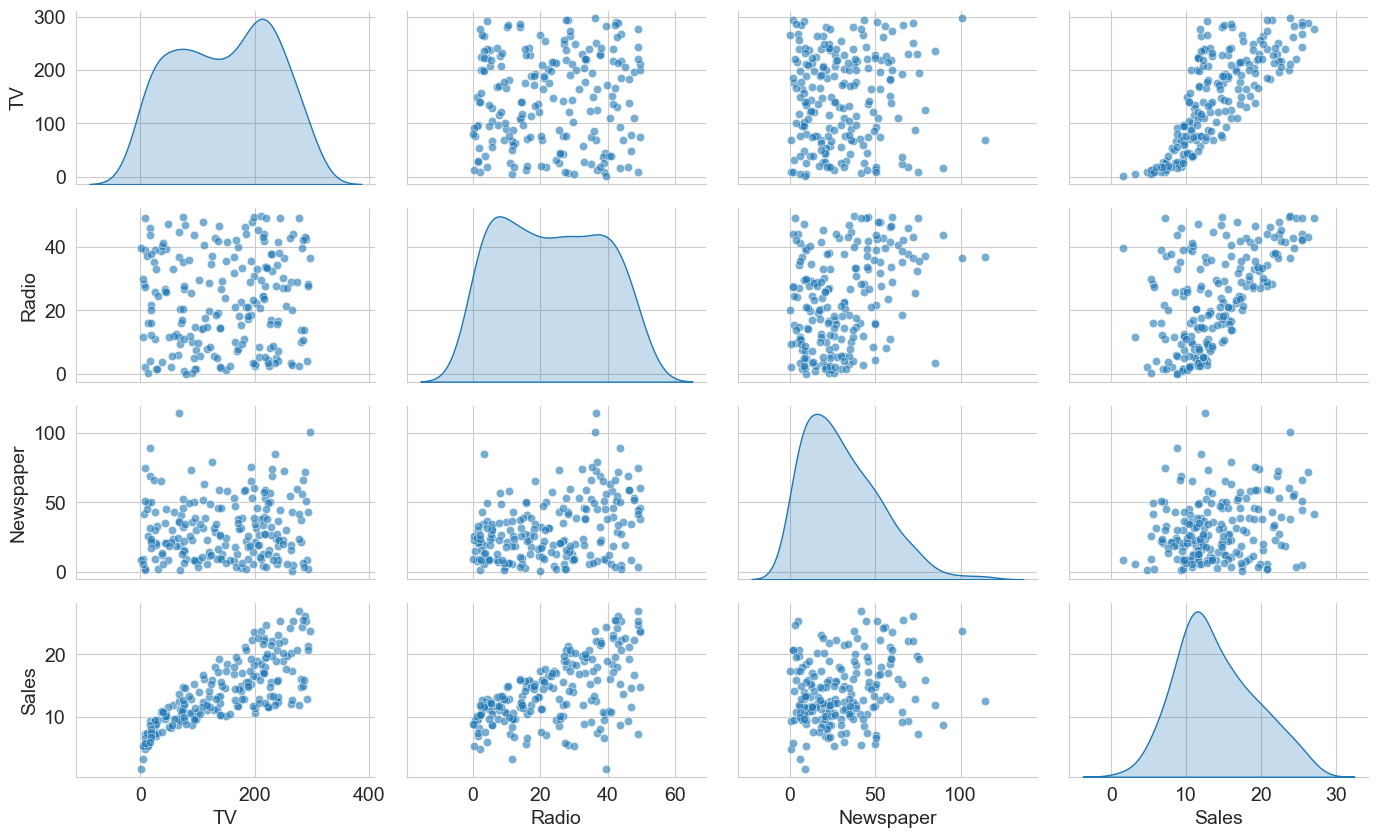

In [23]:
'''绘制两两特征之间的分布关系'''
pairplot = sns.pairplot(
    data,
    height=2.5,
    diag_kind='kde',  # 对角线绘制 KDE
    plot_kws={'alpha': 0.6}  # 散点透明度
)
pairplot.fig.set_size_inches(14, 8.6)  # 直接设置尺寸
plt.tight_layout()
plt.savefig(r'D:\物联网人工智能\实验1\advertising\pairplot_advertising.png', dpi=600)

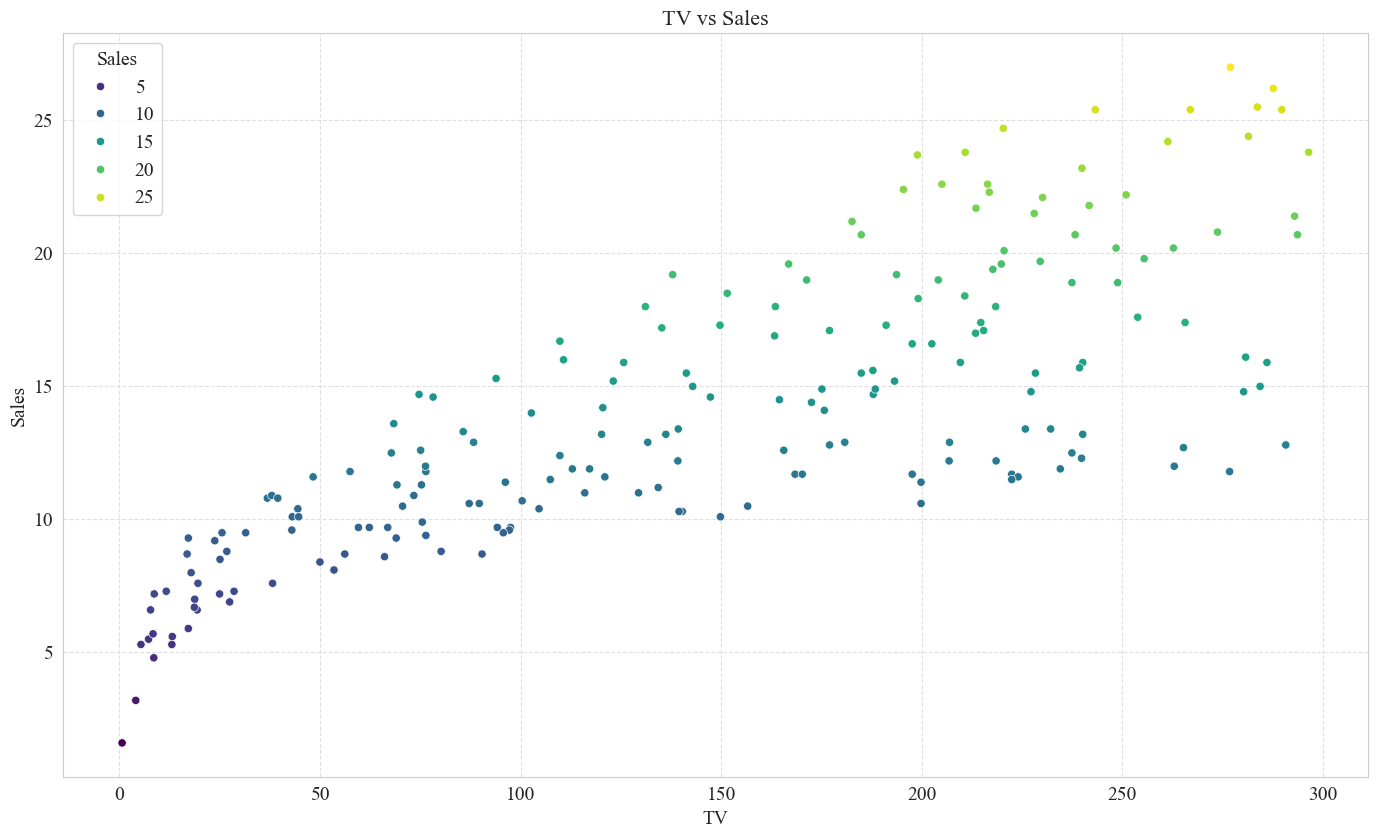

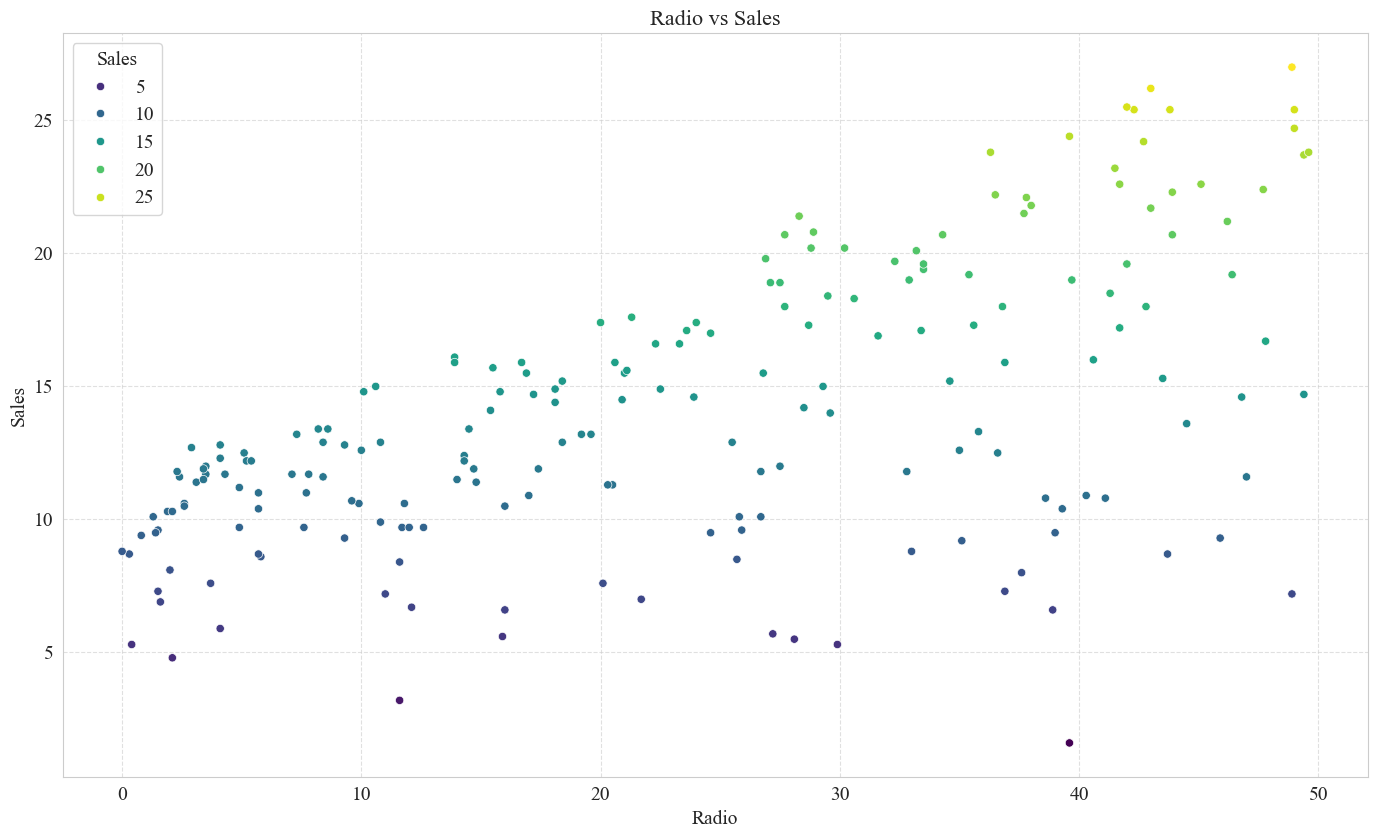

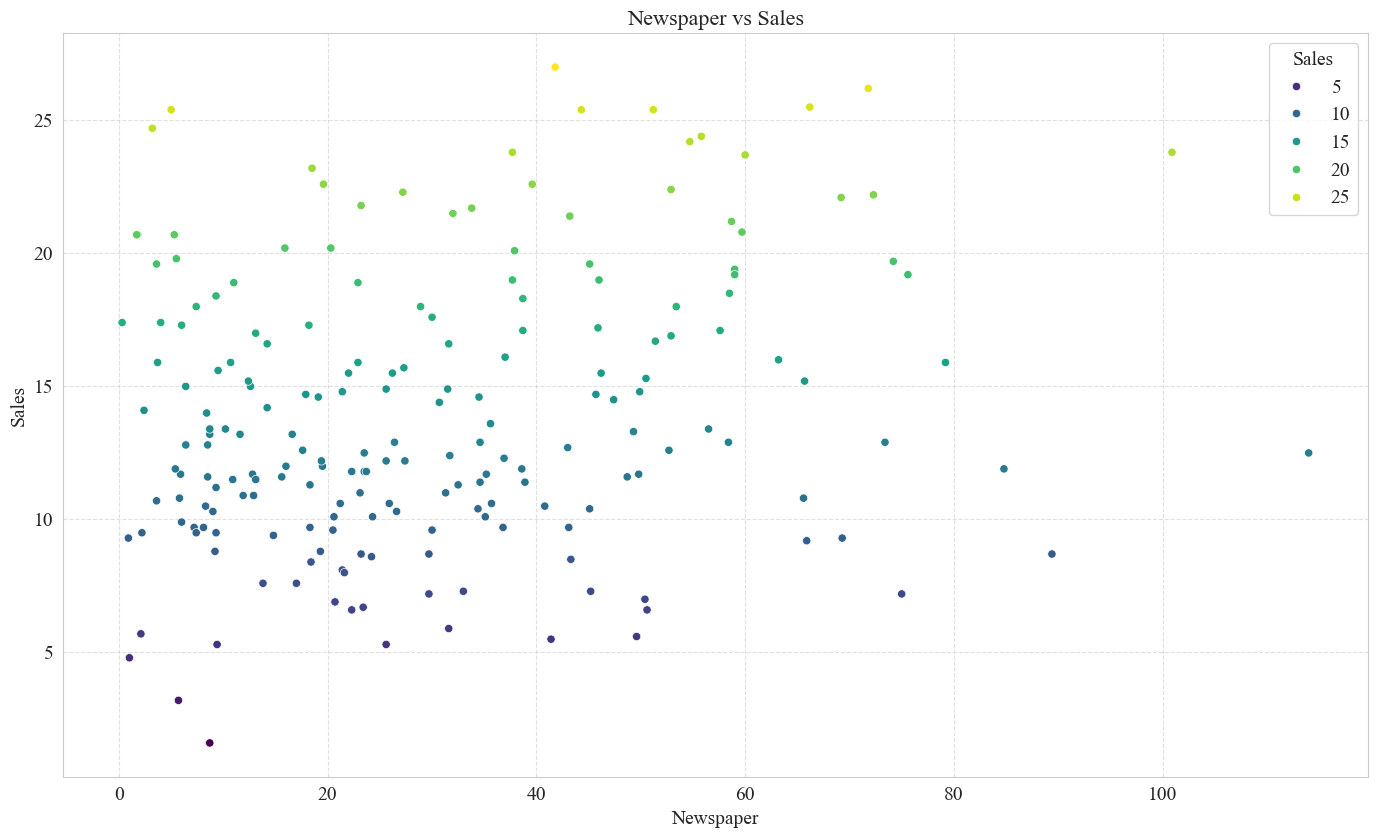

In [12]:
'''要求一：绘制每一个维度特征与销售额的散点图'''
for feature in data.columns[:-1]:  # 假设最后一列是销售额
    plt.figure(figsize=(14, 8.6))  # 设置画布大小
    sns.scatterplot(x=data[feature], y=data['Sales'], hue=data['Sales'], palette='viridis')  # 绘制散点图
    plt.title(f'{feature} vs Sales', fontsize=16)  # 添加标题
    plt.xlabel(feature, fontsize=14)  # 横轴标签
    plt.ylabel('Sales', fontsize=14)  # 纵轴标签
    plt.grid(True, linestyle='--', alpha=0.6)  # 添加网格线
    plt.tight_layout()  # 自动调整布局
    plt.savefig(f'scatter_{feature}_vs_sales.png', dpi=600)  # 保存图像
    plt.show()  # 显示图像

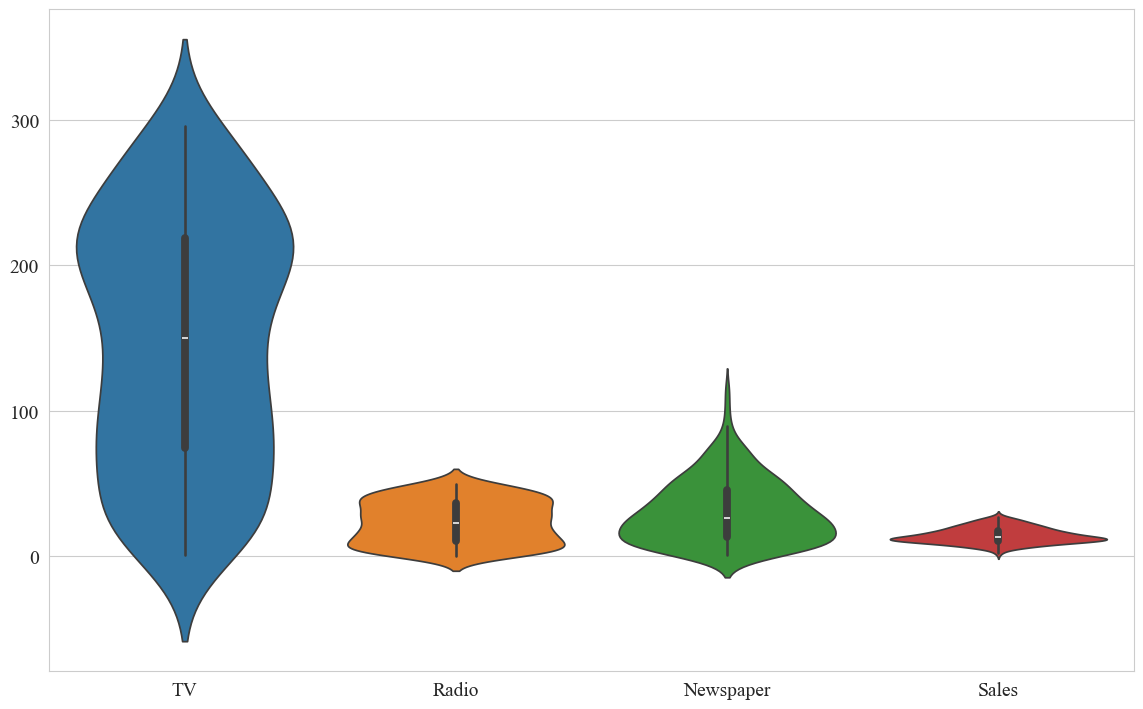

In [14]:
'''小提琴图观察异常值'''
plt.figure(figsize=(14, 8.6))
sns.violinplot(data=data)
plt.savefig(r'violinplot_advertising.png', dpi=600)

In [17]:
'''正态性检验'''


def normality_test(column):
    print(f"\n正态性检验 - {column}")
    stat, p_value = shapiro(data[column])
    print(f"Shapiro-Wilk 检验: 统计量={stat:.4f}, p值={p_value:.4f}")
    stat, p_value = kstest(data[column], 'norm', args=(data[column].mean(), data[column].std()))
    print(f"Kolmogorov-Smirnov 检验: 统计量={stat:.4f}, p值={p_value:.4f}")


for col in data.columns[:4]:
    normality_test(col)


正态性检验 - TV
Shapiro-Wilk 检验: 统计量=0.9495, p值=0.0000
Kolmogorov-Smirnov 检验: 统计量=0.0870, p值=0.0911

正态性检验 - Radio
Shapiro-Wilk 检验: 统计量=0.9440, p值=0.0000
Kolmogorov-Smirnov 检验: 统计量=0.0840, p值=0.1126

正态性检验 - Newspaper
Shapiro-Wilk 检验: 统计量=0.9364, p值=0.0000
Kolmogorov-Smirnov 检验: 统计量=0.0985, p值=0.0384

正态性检验 - Sales
Shapiro-Wilk 检验: 统计量=0.9760, p值=0.0017
Kolmogorov-Smirnov 检验: 统计量=0.0952, p值=0.0499


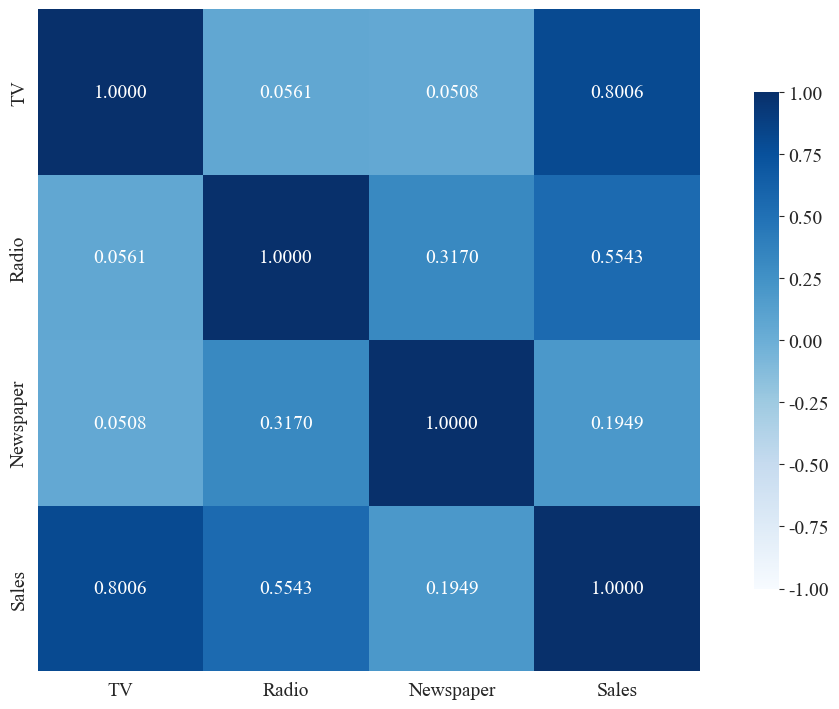

In [15]:
'''相关性分析'''
spearman_corr = data.corr(method='spearman')
plt.figure(figsize=(14, 8.6))
sns.heatmap(spearman_corr, annot=True, cmap='Blues', fmt=".4f", square=True, cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1)
plt.savefig(r'spearman_corr_advertising.png', dpi=600)

In [33]:
'''方差齐性检验'''
groups = [data[col] for col in data.columns[:3]]
levene_stat, levene_p = levene(*groups)
print(f"Levene 检验: 统计量={levene_stat:.4f}, p值={levene_p:.4f}")  # 方差不齐性

Levene 检验: 统计量=367.7289, p值=0.0000


In [34]:
'''差异性分析'''
for i in range(2):
    for j in range(i + 1, 3):
        stat, p_value = wilcoxon(data.iloc[:, i], data.iloc[:, j])
        print(f"特征 {data.columns[i]} 与 {data.columns[j]} 的 Wilcoxon 检验: 统计量={stat:.4f}, p值={p_value:.4f}")  # 均差异显著

特征 TV 与 Radio 的 Wilcoxon 检验: 统计量=414.0000, p值=0.0000
特征 TV 与 Newspaper 的 Wilcoxon 检验: 统计量=623.5000, p值=0.0000
特征 Radio 与 Newspaper 的 Wilcoxon 检验: 统计量=6313.0000, p值=0.0000


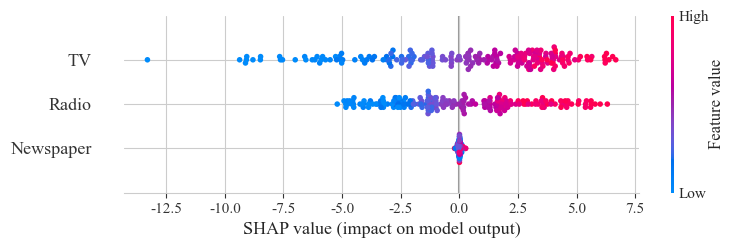

<Figure size 640x480 with 0 Axes>

In [16]:
'''特征重要性'''
model = GradientBoostingRegressor()
X = data.iloc[:, :3]
y = data['Sales']
model.fit(X, y)
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)  # 蜂群图

In [17]:
'''对比多元线性回归、Lasso、Ridge、弹性网络'''
X = data.drop('Sales', axis=1)
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet()
}

param_grid = {
    "Lasso": {'alpha': np.logspace(-4, 4, 100)},
    "Ridge": {'alpha': np.logspace(-4, 4, 100)},
    "ElasticNet": {
        'alpha': np.logspace(-4, 4, 100),
        'l1_ratio': np.linspace(0.01, 1.0, 100)
    }
}

results = {}

predictions_df = pd.DataFrame({'True Values': y_test})

# 对每个模型进行训练、网格搜索和评估
for model_name, model in models.items():
    print(f"\n正在训练 {model_name} 模型...")

    grid_search = GridSearchCV(model, param_grid.get(model_name, {}), cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    print(f"最佳参数：{best_params}")

    best_model = grid_search.best_estimator_
    model_pred = best_model.predict(X_test_scaled)

    predictions_df[f'{model_name} Predictions'] = model_pred

    mae = mean_absolute_error(y_test, model_pred)
    mse = mean_squared_error(y_test, model_pred)
    r2 = r2_score(y_test, model_pred)

    results[model_name] = {
        "Best Params": best_params,
        "MAE": mae,
        "MSE": mse,
        "R^2": r2
    }

    plt.figure(figsize=(14, 8.6))
    plt.scatter(y_test, model_pred, label=model_name, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Perfect Fit")
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predictions', fontsize=14)
    plt.title(f"{model_name}", fontsize=16)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'{model_name}_advertising.png', dpi=600)  # 使用模型名称作为文件名

predictions_df.to_csv('model_predictions_advertising.csv', index=False)

results_df = pd.DataFrame(results).T
print(results_df)


正在训练 Linear Regression 模型...
最佳参数：{}

正在训练 Lasso 模型...
最佳参数：{'alpha': 0.055908101825122285}

正在训练 Ridge 模型...
最佳参数：{'alpha': 0.0001}

正在训练 ElasticNet 模型...
最佳参数：{'alpha': 0.055908101825122285, 'l1_ratio': 1.0}
                                                        Best Params       MAE  \
Linear Regression                                                {}  1.460757   
Lasso                               {'alpha': 0.055908101825122285}  1.455635   
Ridge                                             {'alpha': 0.0001}  1.460757   
ElasticNet         {'alpha': 0.055908101825122285, 'l1_ratio': 1.0}  1.455635   

                        MSE       R^2  
Linear Regression  3.174097  0.899438  
Lasso              3.181189  0.899213  
Ridge              3.174099  0.899438  
ElasticNet         3.181189  0.899213  


MCP Regression Metrics:
MAE: 1.4443, MSE: 3.1379, R²: 0.9006


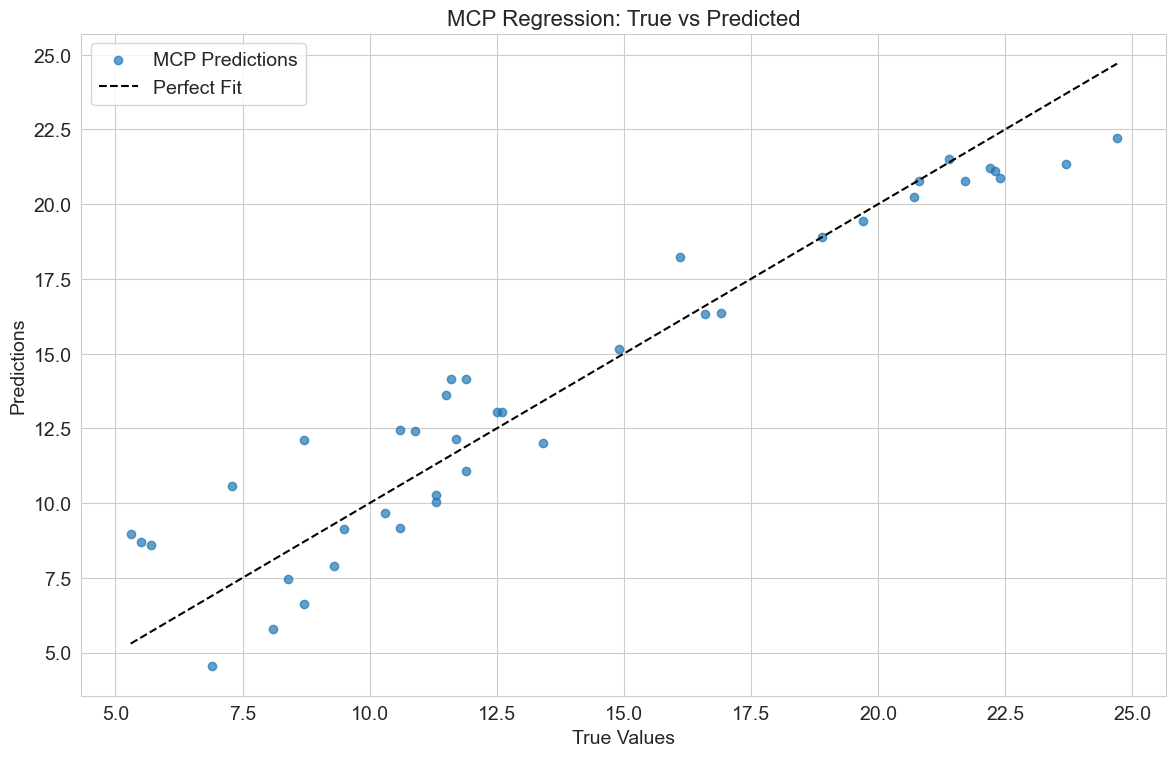

In [24]:
'''MCP惩罚项'''


class MCPRegressor:
    def __init__(self, lambda_=1.0, gamma=2.0, max_iter=1000, tol=1e-4):
        if gamma <= 1:
            raise ValueError("gamma must be greater than 1.")
        self.lambda_ = lambda_
        self.gamma = gamma
        self.max_iter = max_iter
        self.tol = tol
        self.w = None
        self.intercept_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.intercept_ = np.mean(y)
        r = y - self.intercept_  # Initial residual

        for it in range(self.max_iter):
            w_prev = self.w.copy()
            for j in range(n_features):
                # Compute residual considering current coefficient
                r_j = r + X[:, j] * self.w[j]
                z_j = X[:, j].dot(r_j) / n_samples

                # Apply MCP thresholding
                abs_zj = np.abs(z_j)
                sign_zj = np.sign(z_j)

                if abs_zj <= self.lambda_:
                    new_w_j = 0.0
                elif abs_zj <= self.gamma * self.lambda_:
                    new_w_j = (z_j - sign_zj * self.lambda_) / (1 - 1 / self.gamma)
                else:
                    new_w_j = z_j

                # Update residual and coefficient
                delta = new_w_j - self.w[j]
                r -= X[:, j] * delta
                self.w[j] = new_w_j

            # Update intercept
            new_intercept = np.mean(y - X.dot(self.w))
            delta_intercept = new_intercept - self.intercept_
            r -= delta_intercept
            self.intercept_ = new_intercept

            # Check convergence
            max_change = np.max(np.abs(self.w - w_prev))
            if max_change < self.tol:
                break

    def predict(self, X):
        return X.dot(self.w) + self.intercept_


# Assuming 'data' is loaded and preprocessed
X = data.drop('Sales', axis=1)
y = data['Sales']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MCP model
mcp = MCPRegressor(lambda_=0.1, gamma=3.0)
mcp.fit(X_train_scaled, y_train)
mcp_pred = mcp.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, mcp_pred)
mse = mean_squared_error(y_test, mcp_pred)
r2 = r2_score(y_test, mcp_pred)
print(f"MCP Regression Metrics:")
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}")

# Visualize
plt.figure(figsize=(14, 8.6))
plt.scatter(y_test, mcp_pred, alpha=0.7, label='MCP Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Perfect Fit')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.title('MCP Regression: True vs Predicted', fontsize=16)
plt.legend()
plt.savefig(r'MCP_advertising.png', dpi=600)
plt.show()

# 导出预测值和真实值到CSV文件
mcp_predictions_df = pd.DataFrame({
    'True Values': y_test,
    'MCP Predictions': mcp_pred
})
mcp_predictions_df.to_csv('mcp_predictions_advertising.csv', index=False)

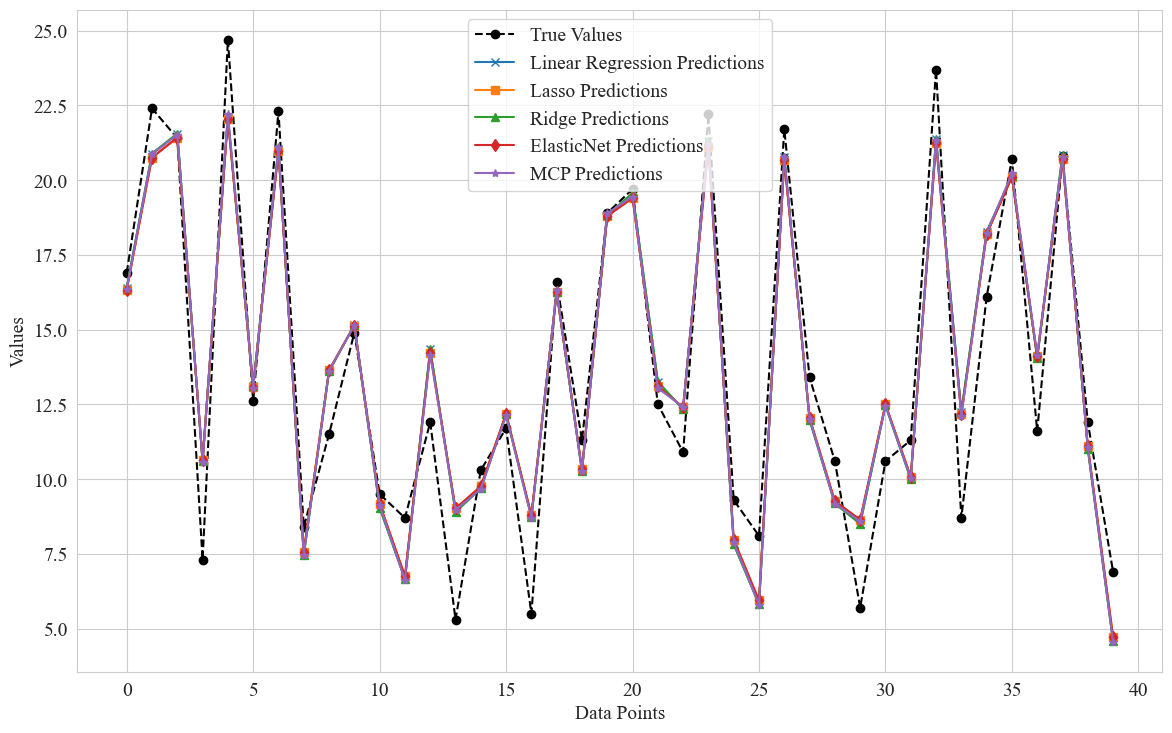

In [21]:
'''预测值真实值对比'''
file_path = 'compare_advertising.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 提取数据
true_values = df.iloc[:, 0]
linear_predictions = df.iloc[:, 1]
lasso_predictions = df.iloc[:, 2]
ridge_predictions = df.iloc[:, 3]
elasticnet_predictions = df.iloc[:, 4]
mcp_predictions = df.iloc[:, 5]

# 绘制图形
plt.figure(figsize=(14, 8.6))

# 绘制真实值
plt.plot(true_values, label='True Values', color='black', marker='o', linestyle='--')

# 绘制各个模型的预测值
plt.plot(linear_predictions, label='Linear Regression Predictions', marker='x')
plt.plot(lasso_predictions, label='Lasso Predictions', marker='s')
plt.plot(ridge_predictions, label='Ridge Predictions', marker='^')
plt.plot(elasticnet_predictions, label='ElasticNet Predictions', marker='d')
plt.plot(mcp_predictions, label='MCP Predictions', marker='*')

# 添加标题和标签
plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Values', fontsize=14)

# 添加图例
plt.legend()
plt.savefig(r'compare_advertising.png', dpi=600)
plt.show()